In [0]:
from datascience import *
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
united = Table.read_table(path_data + 'united_summer2015.csv')

In [2]:
import numpy as np
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))
mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

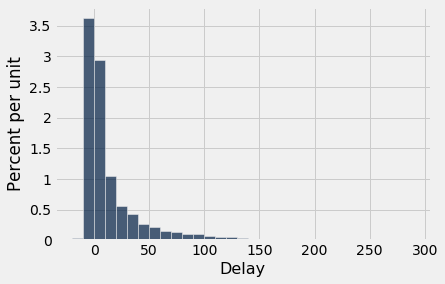

In [3]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
united.select('Delay').hist(bins=np.arange(-20, 300, 10))

In [4]:
delay = united.select('Delay')
np.mean(delay.sample(400).column('Delay'))

20.705

In [0]:
sample_size = 400
repetitions = 10000
means = make_array()

for i in np.arange(repetitions):
    sample = delay.sample(sample_size)
    new_mean = np.mean(sample.column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column(
    'Sample Mean', means)

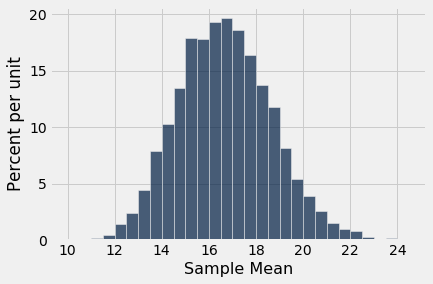

In [6]:
results.hist(bins=np.arange(10, 25, 0.5))

In [0]:
def simulate_sample_mean(table, label, sample_size, repetitions):
    means = make_array()
    for i in range(repetitions):
        new_sample = table.sample(sample_size)
        new_sample_mean = np.mean(new_sample.column(label))
        means = np.append(means, new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.651442000000003
Population SD: 39.480199851609314
SD of sample means: 3.950422448376376


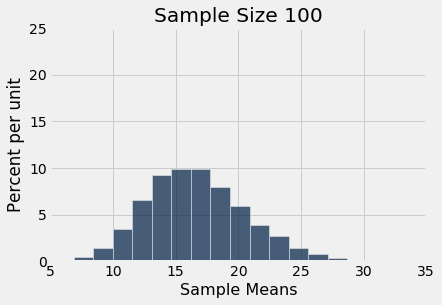

In [8]:
simulate_sample_mean(delay, 'Delay', 100, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.680349500000002
Population SD: 39.480199851609314
SD of sample means: 1.9561426824492505


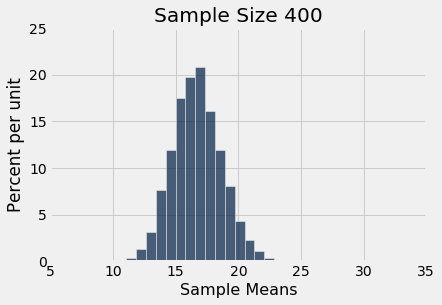

In [9]:
simulate_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.63741904
Population SD: 39.480199851609314
SD of sample means: 1.5841431400443202


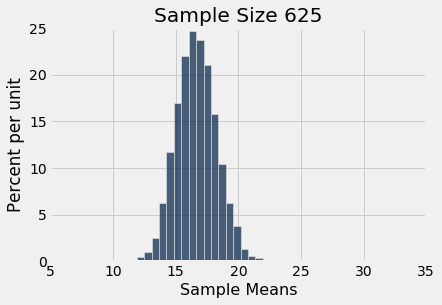

In [10]:
simulate_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

In [11]:
pop_sd = np.std(delay.column('Delay'))
pop_sd

39.480199851609314

In [0]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)
sd_means = make_array()
for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means,
          np.mean(delay.sample(n).column('Delay')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes))

In [13]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",pop_sd/sqrt(n)
25,7.8629,7.89604
50,5.55068,5.58334
75,4.63241,4.55878
100,3.95522,3.94802
125,3.55819,3.53122
150,3.2553,3.22354
175,2.98252,2.98442
200,2.81605,2.79167
225,2.64757,2.63201
250,2.48962,2.49695


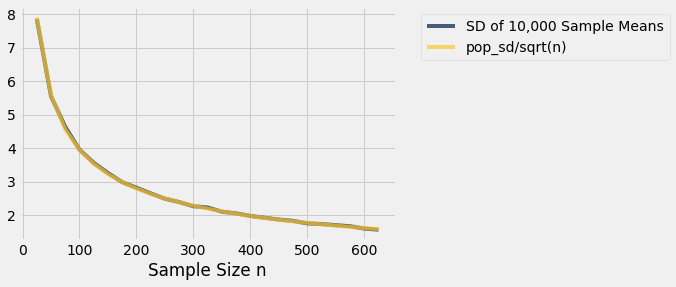

In [14]:
sd_comparison.plot('Sample Size n')